# Feature engineering

In app experience : how they interact with the app which features they click like playlist hamburger button youtube <br>
notification events : notication vidio notfication, features which tries to engage the user <br>
adsEvents : ads click promotional events <br>
engagement events : 
first_open_custom_date_event should be removed from here 
We will take sum of all these and normalize it using min max scaler as to get the score of such things

Engagment, Number of sessions num session can be mixed and than subsetted

share this feature behaving strangely

81616774e29888fe78a3e902f6cecdc9 this id

abnormal user_id : maybe because they can user id for testing purposes

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the data genereted from pyspark

In [ ]:
filename = '/content/drive/MyDrive/Audify/ready_for_eda.csv'
df = pd.read_csv(filename)

# Features
Total unique users in the time period : 6598460 <br>
Features considered : 36

In [ ]:
df.shape

(6598460, 43)

In [ ]:
df.columns = ['user_pseudo_id', 'widget_events', 'totalEventCount',
       'bottom_mini_playing_bar_event', 'sessNum',
       'notification_events', 'video_notification_event',
       'app_clear_data', 'floating_player_event',
       'interstitial_ad_events', 'lyrics_page_events',
       'ad_close_event', 'app_exception', 'profile_page_events',
       'list_item_clicked_event', 'voice_assistant_event',
       'share', 'playlist_event', 'mini_youtube_event',
       'bottom_option_click_event', 'feature_popup_events',
       'current_search_tab_event', 'appRemove', 'theme_event',
       'edit_tags_page_events', 'screen_view',
       'remove_ads_purchase_event', 'user_engagement',
       'genres_page_event', 'personalization_assignment',
       'wellness_event', 'ringtone_cutter_event',
       'album_art_change_event', 'lyrics_open_event',
       'playing_window_event', 'top_tab_event',
       'inside_page_events', 'youtube_event',
       'ham_burger_click_event', 'font_change_event',
       'engTime_sec', 'equalizer_event',
       'settings_page_events']

In [ ]:
df.head(100)

,user_pseudo_id,widget_events,totalEventCount,bottom_mini_playing_bar_event,sessNum,notification_events,video_notification_event,app_clear_data,floating_player_event,interstitial_ad_events,...,lyrics_open_event,playing_window_event,top_tab_event,inside_page_events,youtube_event,ham_burger_click_event,font_change_event,engTime_sec,equalizer_event,settings_page_events
0,c75a7a99f51a8f4e578943bf9bb0b2ed,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
1,45f3e2ee9cc17dba89227869f8c6adf5,0,627,232,12.0,560,48,0,0,56,...,0,512,0,0,48,8,0,2695.690,0,0
2,f1a38b974675019f7a1f63ea8a1c075d,0,123,0,5.0,480,0,0,0,0,...,0,256,0,0,0,0,0,159.483,0,0
3,045441ffe13ac1d934659a8c9a536914,0,26,0,3.0,32,0,0,0,0,...,0,0,0,0,0,0,0,80.546,0,0
4,2280b60eb3247cf54063e3d264e10172,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.061,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98babc5cb6e82f56d3cb93b9c8dd141a,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
96,8b2d8f22ddc5511a72b478f8c0474650,0,180,96,1.0,288,0,0,0,96,...,0,0,0,0,0,0,0,131.160,0,0
97,d5ebb06add96790c445fc28a59868a57,0,46,0,4.0,8,0,0,0,72,...,0,0,0,0,0,0,0,133.460,0,0
98,2b2d783998aa8fae09fda52ad4387cd7,0,160,24,9.0,40,0,0,0,0,...,0,160,0,0,32,0,0,2043.350,0,0


As app remove has majority of uninstalls almost 63 lakh users<br>
Around 28 lakh users uninstalled the app<br>
We are considering appRemove to be binary so greater than one value might be because of multiple clicks on uninstall button<br>
We will be changing all greatre than one value to 1 so that it becomes a binary response<br>

In [ ]:
df.appRemove.value_counts()

0     6318398
1      275111
4        1243
6         756
5         701
7         660
8         654
12        636
2         280
3           6
9           3
24          3
15          2
13          2
10          2
14          2
16          1
Name: appRemove, dtype: int64

In [ ]:
df.loc[ df.appRemove > 1 , 'appRemove' ] = 1

### appRemove changed to binary response

In [ ]:
df.appRemove.value_counts()

0    6318398
1     280062
Name: appRemove, dtype: int64

# Looking For Na Values

In [ ]:
df.isnull().sum()

user_pseudo_id                        0
widget_events                         0
totalEventCount                       0
bottom_mini_playing_bar_event         0
sessNum                           68946
notification_events                   0
video_notification_event              0
app_clear_data                        0
floating_player_event                 0
interstitial_ad_events                0
lyrics_page_events                    0
ad_close_event                        0
app_exception                         0
profile_page_events                   0
list_item_clicked_event               0
voice_assistant_event                 0
share                                 0
playlist_event                        0
mini_youtube_event                    0
bottom_option_click_event             0
feature_popup_events                  0
current_search_tab_event              0
appRemove                             0
theme_event                           0
edit_tags_page_events                 0


In [ ]:
takeTheMean = df.groupby('appRemove').mean().transpose()
takeTheMean

appRemove,0,1
widget_events,9.648398,0.369061
totalEventCount,357.395974,27.114028
bottom_mini_playing_bar_event,38.591762,2.133985
sessNum,8.380855,1.333212
notification_events,421.981833,17.812427
video_notification_event,0.853985,0.529083
app_clear_data,0.366268,0.081011
floating_player_event,1.616766,0.134142
interstitial_ad_events,110.447731,5.244439
lyrics_page_events,1.214717,0.178303


# Split  on totalEvents

In [ ]:
df_high = df.loc[df.totalEventCount >= 15 , :]

# EDA on High

In [ ]:
in_app_experience = [
 'app_exception',
 'app_clear_data',
 'album_art_change_event',
 'bottom_mini_playing_bar_event',
 'bottom_option_click_event',
 'current_search_tab_event',
 'edit_tags_page_events',
 'equalizer_event',
 'font_change_event',
 'genres_page_event',
 'ham_burger_click_event',
 'inside_page_events',
 'list_item_clicked_event',
 'playing_window_event',
 'playlist_event',
 'settings_page_events',
 'theme_event',
 'top_tab_event',
 'widget_events',             
]

profile_visits = [
        'personalization_assignment',
        'profile_page_events',
        'wellness_event',

]

special_features = [
      'floating_player_event',
      'lyrics_open_event',
      'lyrics_page_events',
      'mini_youtube_event',
      'ringtone_cutter_event',
      'voice_assistant_event',
      'youtube_event',
      'feature_popup_events',

]

notification_events = [
   'notification_events',
   'video_notification_event',                   
]

adsEvents = [
    'ad_close_event',    
    'remove_ads_purchase_event',
    'interstitial_ad_events', 
]

engagement_events =[
    'engTime_sec',   
    'user_engagement',             
]

to_modify = [
  'totalEventCount',
  'sessNum', 
  'screen_view', 
  'share',         
]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc


def make_con(y_pred,y_test):
    # actual values
    actual = y_test
     # predicted values
    predicted = y_pred

    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0])
    print('Confusion matrix : \n',matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n',matrix)
    
def make_curve(probs,y_test):
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # method I: plt

    plt.title('ROC CURVE')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Now lets work for Loyal Customers who are using app for long time

In [ ]:
df_high.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
widget_events,5697823.0,10.685507,179.483346,0.0,0.000,0.000,0.000,73864.000
totalEventCount,5697823.0,396.733188,807.067637,15.0,58.000,160.000,421.000,369546.000
bottom_mini_playing_bar_event,5697823.0,42.840411,130.077457,0.0,0.000,8.000,40.000,42048.000
sessNum,5692037.0,9.116987,9.486014,1.0,2.000,6.000,13.000,210.000
notification_events,5697823.0,468.623230,1641.594812,0.0,8.000,64.000,320.000,265344.000
video_notification_event,5697823.0,0.972470,14.718054,0.0,0.000,0.000,0.000,7352.000
app_clear_data,5697823.0,0.394823,19.692019,0.0,0.000,0.000,0.000,9912.000
floating_player_event,5697823.0,1.765744,80.324355,0.0,0.000,0.000,0.000,77464.000
interstitial_ad_events,5697823.0,122.425715,581.791944,0.0,0.000,0.000,48.000,185864.000
lyrics_page_events,5697823.0,1.355678,52.562459,0.0,0.000,0.000,0.000,62336.000


The max values of each colums  is abnormally high <br>
We are taking the  assumption that these are bots not real world users<br>
as these accounts might be used for testing purposes <br>
we will be considering them outliers and will be removed for modeling purposes <br>
removing those users whose values are 

In [ ]:
df_high["sum_in_app_exp"] = df_high.loc[:,in_app_experience].sum(axis=1)
df_high["sum_special_features"] = df_high.loc[:,special_features].sum(axis=1)
df_high["sum_adsEvents"] = df_high.loc[:,adsEvents].sum(axis=1)
df_high["sum_engagement_events"] = df_high.loc[:,engagement_events].sum(axis=1)
df_high["sum_notification_events"] = df_high.loc[:,notification_events].sum(axis=1)
df_high["sum_profile_visits"] = df_high.loc[:,profile_visits].sum(axis=1)

df_high.drop(in_app_experience,axis=1,inplace=True)
df_high.drop(special_features,axis=1,inplace=True)
df_high.drop(notification_events,axis=1,inplace=True)
df_high.drop(adsEvents,axis=1,inplace=True)
df_high.drop(engagement_events,axis=1,inplace=True)
df_high.drop("totalEventCount",axis=1,inplace=True)
df_high.drop("share",axis=1,inplace=True)
df_high.drop(profile_visits,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_high.head()

,user_pseudo_id,sessNum,appRemove,screen_view,sum_in_app_exp,sum_special_features,sum_adsEvents,sum_engagement_events,sum_notification_events,sum_profile_visits
1,45f3e2ee9cc17dba89227869f8c6adf5,12.0,0,1336,760,48,696,3663.690,608,384
2,f1a38b974675019f7a1f63ea8a1c075d,5.0,0,104,256,0,16,199.483,480,32
3,045441ffe13ac1d934659a8c9a536914,3.0,0,56,8,0,8,128.546,32,24
5,221ab279ca417be5b9fca8a258423f56,6.0,0,336,56,0,120,700.567,2304,0
6,e2688adbe119c58b1c6ae2a4a2b08d47,17.0,0,7760,3512,32,2936,19513.331,16,264


In [ ]:
cols = [ 'sessNum', 'screen_view', 'sum_in_app_exp', 'sum_adsEvents', 'sum_engagement_events',
       'sum_notification_events'] # one or more

Q1 = df_high[cols].quantile(0.25)
Q3 = df_high[cols].quantile(0.75)
IQR = Q3 - Q1

df_high = df_high[~( df_high[cols] > (Q3 + 1.5 * IQR)).any(axis=1)]

Now the outliers are removed. 
We can even go for data smoothening.

In [ ]:
df_high.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sessNum,4131678.0,5.705590,5.199568,1.0,2.00000,4.0000,8.00000,29.000
appRemove,4136798.0,0.013302,0.114564,0.0,0.00000,0.0000,0.00000,1.000
screen_view,4136798.0,415.862640,432.658429,0.0,112.00000,256.0000,552.00000,2560.000
sum_in_app_exp,4136798.0,192.314997,232.975156,0.0,32.00000,104.0000,256.00000,1352.000
sum_special_features,4136798.0,6.458916,46.762037,0.0,0.00000,0.0000,0.00000,27696.000
sum_adsEvents,4136798.0,71.933545,81.420277,0.0,16.00000,40.0000,96.00000,424.000
sum_engagement_events,4136798.0,789.090689,942.981581,0.0,157.19225,426.5145,1038.19375,5239.104
sum_notification_events,4136798.0,102.302565,156.528640,0.0,8.00000,32.0000,128.00000,784.000
sum_profile_visits,4136798.0,60.061971,74.886189,0.0,8.00000,32.0000,80.00000,1360.000


In [ ]:
df_high.shape

(4136798, 10)

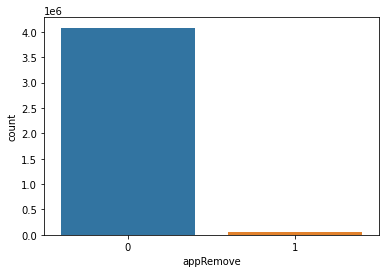

In [ ]:
sns.countplot(data=df_high,x="appRemove")

as we can see  the data is highly skewed

This ditribution of 99 percent positive and 1 percent positive proves loyal customers have very less probabilty of churnign

In [ ]:
df_high.appRemove.value_counts()/df_high.shape[0]

0    0.986698
1    0.013302
Name: appRemove, dtype: float64

In [ ]:
df_high['sessNum'].fillna(value=df_high['sessNum'].mean(), inplace=True)

In [ ]:
df_high.isnull().sum()

user_pseudo_id             0
sessNum                    0
appRemove                  0
screen_view                0
sum_in_app_exp             0
sum_special_features       0
sum_adsEvents              0
sum_engagement_events      0
sum_notification_events    0
sum_profile_visits         0
dtype: int64

In [ ]:
correlation_mat = df_high.drop(["user_pseudo_id"],axis=1).corr()
correlation_mat.style.background_gradient(cmap='coolwarm')

,sessNum,appRemove,screen_view,sum_in_app_exp,sum_special_features,sum_adsEvents,sum_engagement_events,sum_notification_events,sum_profile_visits
sessNum,1.000000,-0.084823,0.611655,0.525602,0.018328,0.461452,0.485417,0.459042,0.560198
appRemove,-0.084823,1.000000,-0.049127,-0.042217,0.020063,-0.066385,-0.063151,-0.057627,-0.064387
screen_view,0.611655,-0.049127,1.000000,0.738945,0.103373,0.523807,0.633340,0.388175,0.538725
sum_in_app_exp,0.525602,-0.042217,0.738945,1.000000,0.081763,0.387518,0.583767,0.374044,0.452059
sum_special_features,0.018328,0.020063,0.103373,0.081763,1.000000,0.019441,0.137904,0.016247,0.023227
sum_adsEvents,0.461452,-0.066385,0.523807,0.387518,0.019441,1.000000,0.349189,0.317966,0.428418
sum_engagement_events,0.485417,-0.063151,0.633340,0.583767,0.137904,0.349189,1.000000,0.250241,0.376763
sum_notification_events,0.459042,-0.057627,0.388175,0.374044,0.016247,0.317966,0.250241,1.000000,0.410658
sum_profile_visits,0.560198,-0.064387,0.538725,0.452059,0.023227,0.428418,0.376763,0.410658,1.000000


In [ ]:
df_test = df_high[(df_high.appRemove == 0)].sample(100000,random_state= 0)

In [ ]:
df_high = df_high[~df_high.isin(df_test)].dropna()

In [ ]:
df_test.shape

(100000, 10)

In [ ]:
df_high.shape

(4036798, 10)

In [ ]:
X = df_high.drop('appRemove',axis=1)
y= df_high['appRemove']

In [ ]:
X.drop("user_pseudo_id",axis=1,inplace=True)

In [ ]:
X.drop("sessNum",axis=1,inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
smote = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.3)
steps = [ ('u', under),('s', smote)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb

clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42)
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
results = cross_val_score(clf_xgb, X_train_model, y_train_model, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 87.28% (0.23%)


In [ ]:
import xgboost as xgb
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42)
model = clf_xgb.fit(X_train_model,y_train_model,verbose=False)

In [ ]:
model

XGBClassifier(seed=42)

Confusion matrix : 
 [[16923  7381]
 [ 3444 56994]]
Outcome values : 
 56994 3444 7381 16923
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.70      0.76     24304
           0       0.89      0.94      0.91     60438

    accuracy                           0.87     84742
   macro avg       0.86      0.82      0.84     84742
weighted avg       0.87      0.87      0.87     84742



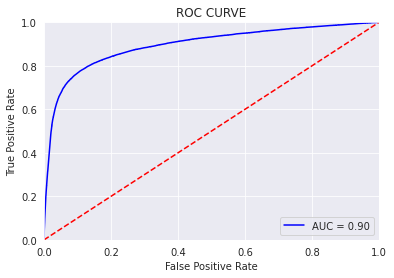

In [ ]:
y_pred = clf_xgb.predict(X_test_model)
make_con(y_pred,y_test_model)

proba = clf_xgb.predict_proba(X_test_model)
make_curve(proba,y_test_model)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.2 MB/s 


In [ ]:
import shap
explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_test_model)

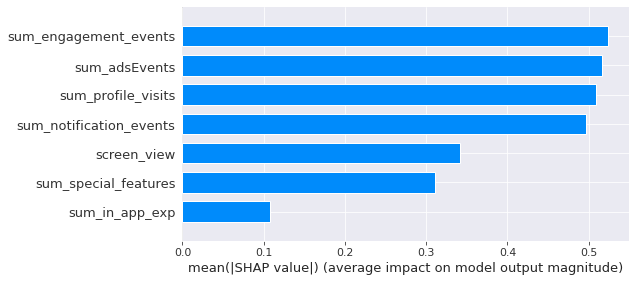

In [ ]:
shap.summary_plot(shap_values, X_test_model, plot_type="bar")

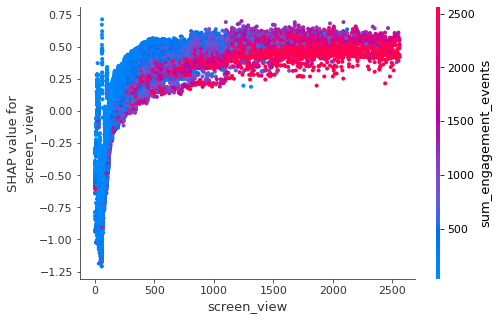

In [ ]:
shap.dependence_plot("screen_view", shap_values, X_test_model)

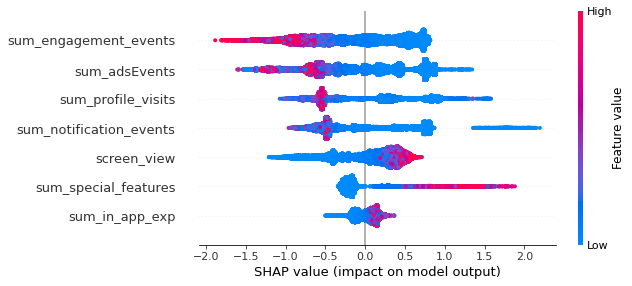

In [ ]:
shap.summary_plot(shap_values, X_test_model)

# **Applyig logistic regression**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
results = cross_val_score(logreg, X_train_model, y_train_model, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 82.04% (0.29%)


In [ ]:
sns.set_style("darkgrid")

Confusion matrix : 
 [[12480 11824]
 [ 3284 57154]]
Outcome values : 
 57154 3284 11824 12480
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.51      0.62     24304
           0       0.83      0.95      0.88     60438

    accuracy                           0.82     84742
   macro avg       0.81      0.73      0.75     84742
weighted avg       0.82      0.82      0.81     84742



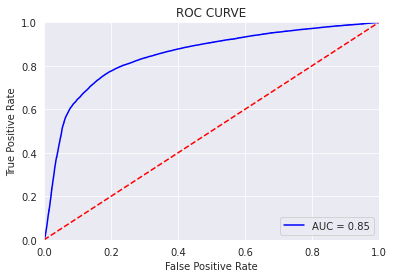

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
model = logreg.fit(X_train_model,y_train_model)

y_pred = logreg.predict(X_test_model)
make_con(y_pred,y_test_model)

proba = logreg.predict_proba(X_test_model)
make_curve(proba,y_test_model)

In [ ]:
proba = logreg.predict_proba(df_test.drop(["user_pseudo_id","appRemove","sessNum"],axis=1))
proba[:,1]

array([0.02939015, 0.03622452, 0.50101251, ..., 0.00159136, 0.00267337,
       0.19022887])

(array([37069., 14135., 13193., 15188., 14946.,  4339.,   653.,   246.,
          115.,   116.]),
 array([1.33217467e-09, 1.00000001e-01, 2.00000001e-01, 3.00000001e-01,
        4.00000001e-01, 5.00000001e-01, 6.00000001e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

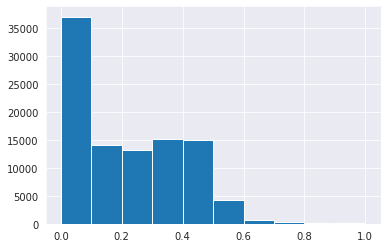

In [ ]:
plt.hist(proba[:,1])

# **Generating the output. Probability of churning and their rank**

In [ ]:
Final_Results = pd.DataFrame({ "user_pseudo_id": df_test.user_pseudo_id,"churn_probability" :  proba[:,1]})
Final_Results = Final_Results.reset_index(drop = True)
Final_Results.head()

,user_pseudo_id,churn_probability
0,bb709eb429cda1ebfb20bf8a0ab1c2da,0.029390
1,cb9cb3dbeeb74d7772d6c963745b670b,0.036225
2,c14bde19f9d808a921490c50ae7a20e8,0.501013
3,6f5c5d51ef2ffe11b6def62a69226888,0.411659
4,135a18f38132027a86fb537cb03f3968,0.416682


In [ ]:
Final_Results["rank"] = (Final_Results.churn_probability.rank(method='max',ascending=False)).astype('int')
Final_Results['rank'] = (Final_Results["rank"] -( Final_Results.loc[0,"rank"]-1))

In [ ]:
Final_Results = Final_Results.sort_values(by="rank")

In [ ]:
Final_Results["rank"] = Final_Results["rank"] +77899
Final_Results

,user_pseudo_id,churn_probability,rank
26082,a37027d697cad5cb23d8e635807cb840,1.000000e+00,1
18824,02fc14f93e2cf9cbf9f5e9216c9a1e43,1.000000e+00,1
49606,cc3e539b96278571a30efd9a7d7b5069,9.999823e-01,2
1126,4dd5faae5dccf86ff9534c7b814ef760,9.999617e-01,3
65975,336dbc16e4e254251df3693e29267b04,9.999220e-01,4
...,...,...,...
43345,647f02e6730dd9513c1469e176efdcea,6.064739e-09,99995
20071,ae253d981dfef64e0aab64df41d4b7f0,5.183242e-09,99996
74309,02c8ca7483f8a6a563ba9074555a6156,4.284111e-09,99997
42345,91892ceb71c82c5fe7d0921f9a62e159,3.513822e-09,99998


In [ ]:
Final_Results.to_csv("old_user_probility_prediction.csv",header=True,index=False)